In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
parentdir = os.path.dirname(os.getcwd())
sys.path.append(parentdir)
sys.path.append(os.path.join(parentdir, 'py'))
import ncreate3d as nc
from config import cfg
import plot_general as pg

### Create nozzle geometry. This will export mesh variables

In [5]:
help(nc.NozVars.__init__)

Help on function __init__ in module ncreate3d:

__init__(self, bathWidth: float = 16, bathHeight: float = 7, bathDepth: float = 7, frontWidth: float = 4, vink: float = 10, vbath: float = 10, npts: int = 50, nozzleInnerWidth: float = 0.603, nozzleThickness: float = 0.152, nozzleAngle: float = 0, horizontal: bool = False, **kwargs)
    Allowed input variables:
    bathWidth: (default=16) bath width in nozzle inner diameters (x)
    bathHeight: (default=7) bath height in nozzle inner diameters (y)
    bathDepth: (default=7) bath depth in nozzle inner diameters (z)
    frontWidth: (default=4) front of nozzle bath width in nozzle inner diameters
    vink: (default=10) ink extrusion speed in mm/s
    vbath: (default=10) bath translation speed in mm/s
    npts: (default=50) number of points in the circle used to define the nozzle
    nozzleInnerWidth: (default=0.603) inner diameter of the nozzle in mm
    nozzleThickness: (default=0.152) nozzle wall thickness in mm
    nozzleAngle: (default=0

In [6]:
help(nc.genericMesh)

Help on function genericMesh in module ncreate3d:

genericMesh(parentFolder: str, **kwargs) -> ncreate3d.FileGroup
    This generates a folder with mesh and geometry files, but nothing else important. If you want to customize the nozzle, input keyword variables. e.g. genericMesh(myFolder, bathWidth=16)



In [ ]:
fg = nc.genericMesh(os.path.join(cfg.path.c, 'LapRDTall'), npts=50, bathHeight=10, bathWidth=16) # generate mesh files
fg.plot.savefig(os.path.join(cfg.path.fig, 'yieldingsweep','plots', 'LapRDTall', 'nozzleDiagramTall.png')) # export the diagram of the nozzle

In [ ]:
fg = nc.genericMesh(os.path.join(cfg.path.c, 'conical'), npts=50, bathDepth=16, bathHeight=10, nozzleAngle=10) # generate mesh files
fg.plot.savefig(os.path.join(cfg.path.fig, 'conicalNozzle', 'plots', 'nozzleDiagram.svg')) # export the diagram of the nozzle

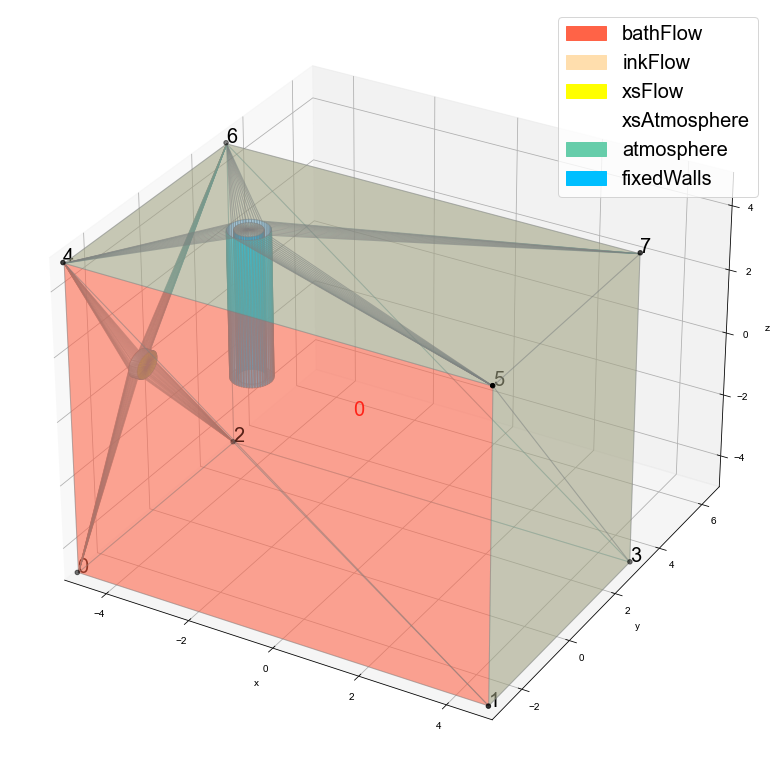

In [9]:
rhoi = '1000'; rhos = '1000'; sigma = '0.04' # sigma 0 or '0.04'
mi = 'Newtonian'; ms = 'Newtonian'
nui = '0.001'; nus = '0.001' # Newt
ref = pg.extractSim(mi,ms,rhoi,rhos,sigma,nui=nui,nus=nus)
rf = os.path.join(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\newtnewtsweep',ref)
fg = nc.genericMesh(cfg.path.c, npts=50, bathDepth=16, bathHeight=10, adjacent='y', distance=0.875, reffolder=rf) # generate mesh files
fg.plot.savefig(os.path.join(cfg.path.fig, 'adjacent', 'nozzleDiagramAdj.svg')) # export the diagram of the nozzle

In [ ]:
fg = nc.genericMesh(os.path.join(cfg.path.c, 'nonozzle')) # generate mesh files

## Generate simulation files

Usage:
<br>e.g. To create a Newtonian fluid of viscosity 1000 Pa s and density 1100 kg/m^3:
<br>&nbsp;&nbsp;&nbsp;&nbsp;`myFluid = nc.Fluid(nu=1000, rho=1100, units='Pas')`
<br>or to create a Newtonian fluid of viscosity 1000 Pa s and density 1000 kg/m^3:
<br>&nbsp;&nbsp;&nbsp;&nbsp;`myFluid = nc.Fluid(nu=1000, units='Pa')`
<br>e.g. To create a Herschel-Bulkley fluid of plateau viscosity 4 Pas, yield stress 1 Pa, consistency index 10, power law index 0.5:
<br>&nbsp;&nbsp;&nbsp;&nbsp;`myFluid = nc.Fluid(nu0=4, tau0=1, k=10, n=0.5, units="Pa")`
<br>You can also give the fluid a label, but the label won't be used during file generation. You need to use it separately.
<br>&nbsp;&nbsp;&nbsp;&nbsp;`myFluid = nc.Fluid(label='myLabel', nu0=4, tau0=1, k=10, n=0.5, units="Pa")`
<br><br>
<br>Sigma must be in J/m^2 (e.g. 0.04 J/m^2)
<br>To create a simulation folder, use genericExport.
<br>&nbsp;&nbsp;&nbsp;&nbsp;`nc.genericExport(folderNumber, fluid1, fluid2, surfaceTension, parentFolder, exportMesh=False)`
<br>To create a simulation folder with its own mesh files, use exportMesh=True.
<br>&nbsp;&nbsp;&nbsp;&nbsp;`nc.genericExport(folderNumber, fluid1, fluid2, surfaceTension, parentFolder, exportMesh=True)`

## adjacent

In [4]:
# file://cfs2e.nist.gov/642/NIST_Projects/Additive%20Manufacturing%20and%20Rheology/OpenFOAM/simulations/viscositysweep/
# newtnewt
aj = True
rhoi = '1000'; rhos = '1000'; sigma = '0.04' # sigma 0 or '0.04'
mi = 'Newtonian'; ms = 'Newtonian'
nui = '0.001'; nus = '0.001' # Newt

if aj:
    ref = pg.extractSim(mi,ms,rhoi,rhos,sigma,nui=nui,nus=nus)
    dist = [0.5, 0.625, 0.75, 1, 1.25]
    print(ref)

# dist = [0.875]
topfolder = os.path.join(cfg.path.c, 'adjacent') # this is the parent folder that holds everything
rf = os.path.join(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\newtnewtsweep',ref)

sigma = float(sigma); rho = float(rhoi)
nu = float(nui)*10**3
fluid = nc.Fluid(units = "Pa", label = '', nu = nu , rho = rho)

iiList = [7,8,9,11,12]
# iiList = [1000]
for i,d in enumerate(dist):
    ii = 'aj'+str(iiList[i])
    nc.genericExport(ii, fluid, fluid, sigma, topfolder, reffolder=rf, adjacent='y', distance=d, exportMesh=True)
    # nc.genericExport(ii, fluid, fluid, sigma, topfolder, exportMesh=True)

nb32


INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj7
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj7\case
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj7\case\0
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj7\case\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj7\case\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj7\geometry
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj7\mesh
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj7\mesh\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj7\mesh\constant\triSurface
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj7\mesh\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj7\mesh\0
INFO:root:Exported file C:/Users/rtg2/Documents\adjacent\aj7\legend.csv
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj8
INFO:root:Created directory C:/Users/r

In [5]:
# HBHB
aj = True
rhoi = '1000'; rhos = '1000'; sigma = '0' # sigma '0' or '0.04'
mi = 'HerschelBulkley'; ms = 'HerschelBulkley'
nu0i = '10'; nu0s = '10'; tau0i = '0.01'; tau0s = '0.01'; ki = '0.00375'; ks = '0.00375'; ni = 0.45; ns = 0.45 # HB

if aj:
    ref = pg.extractSim(mi,ms,rhoi,rhos,sigma,nu0i=nu0i,nu0s=nu0s,tau0i=tau0i,tau0s=tau0s,ki=ki,ks=ks,ni=ni,ns=ns)
    # dist = [0.5, 0.625, 0.75, 0.875, 1, 1.25]
    print(ref)

dist = [0.875]
dist = [0.5, 0.625, 0.75, 1, 1.25]
topfolder = os.path.join(cfg.path.c, 'adjacent') # this is the parent folder that holds everything
rf = os.path.join(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\HBHBsweep',ref)

sigma = float(sigma); rho = float(rhoi)
tau0 = float(tau0i)*10**3; k = float(ki)*10**3; n = float(ni); nu0 = float(nu0i)*10**3
fluid = nc.Fluid(units = "Pa", tau0=tau0, k=k, n=n, nu0=nu0, rho=rho)

# iiList = [31,32,33,34,35,36]
iiList = [130]
iiList = [37,38,39,41,42]
for i,d in enumerate(dist):
    ii = 'aj'+str(iiList[i])
    nc.genericExport(ii, fluid, fluid, sigma, topfolder, reffolder=rf, adjacent='y', distance=d, vink=0, exportMesh=True)

nb455
0.3014999999999999


INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj37
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj37\case
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj37\case\0
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj37\case\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj37\case\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj37\geometry
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj37\mesh
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj37\mesh\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj37\mesh\constant\triSurface
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj37\mesh\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj37\mesh\0
INFO:root:Exported file C:/Users/rtg2/Documents\adjacent\aj37\legend.csv


0.3014999999999999


INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj38
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj38\case
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj38\case\0
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj38\case\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj38\case\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj38\geometry
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj38\mesh
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj38\mesh\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj38\mesh\constant\triSurface
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj38\mesh\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj38\mesh\0
INFO:root:Exported file C:/Users/rtg2/Documents\adjacent\aj38\legend.csv


0.3014999999999999


INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj39
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj39\case
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj39\case\0
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj39\case\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj39\case\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj39\geometry
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj39\mesh
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj39\mesh\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj39\mesh\constant\triSurface
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj39\mesh\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj39\mesh\0
INFO:root:Exported file C:/Users/rtg2/Documents\adjacent\aj39\legend.csv


0.3014999999999999


INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj41
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj41\case
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj41\case\0
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj41\case\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj41\case\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj41\geometry
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj41\mesh
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj41\mesh\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj41\mesh\constant\triSurface
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj41\mesh\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj41\mesh\0
INFO:root:Exported file C:/Users/rtg2/Documents\adjacent\aj41\legend.csv


0.3014999999999999


INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj42
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj42\case
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj42\case\0
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj42\case\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj42\case\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj42\geometry
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj42\mesh
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj42\mesh\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj42\mesh\constant\triSurface
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj42\mesh\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj42\mesh\0
INFO:root:Exported file C:/Users/rtg2/Documents\adjacent\aj42\legend.csv


In [8]:
# newtHB
aj = True
rhoi = '1000'; rhos = '1000'; sigma = '0' # sigma 0 or '0.04'
mi = 'HerschelBulkley'; ms = 'Newtonian'
nu0i = '10'; tau0i = '0.01'; ki = '0.00375'; ni = 0.45
nus = '0.001'

if aj:
    ref = pg.extractSim(mi,ms,rhoi,rhos,sigma,nu0i=nu0i,tau0i=tau0i,ki=ki,ni=ni,nus=nus)
    # dist = [0.5, 0.625, 0.75, 0.875, 1, 1.25]
    print(ref)

dist = [0.875]
topfolder = os.path.join(cfg.path.c, 'adjacent') # this is the parent folder that holds everything
rf = os.path.join(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\newtHBsweep',ref)

sigma = float(sigma); rho = float(rhoi)
tau0 = float(tau0i)*10**3; k = float(ki)*10**3; n = float(ni); nu0 = float(nu0i)*10**3
nu = float(nus)*10**3
inkfluid = nc.Fluid(units = "Pa", tau0=tau0, k=k, n=n, nu0=nu0, rho=rho)
supfluid = nc.Fluid(units = "Pa", label = '', nu = nu , rho = rho)

# iiList = [13,14,15,16,17,18]
iiList = [88]
for i,d in enumerate(dist):
    ii = 'aj'+str(iiList[i])
    nc.genericExport(ii, supfluid, inkfluid, sigma, topfolder, reffolder=rf, adjacent='y', distance=d, vink=0, exportMesh=True)
    # nc.genericExport(ii, fluid, fluid, sigma, topfolder, exportMesh=True) # make sure this still works periodically

nb187


INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj88
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj88\case
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj88\case\0
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj88\case\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj88\case\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj88\geometry
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj88\mesh
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj88\mesh\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj88\mesh\constant\triSurface
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj88\mesh\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj88\mesh\0
INFO:root:Exported file C:/Users/rtg2/Documents\adjacent\aj88\legend.csv


In [15]:
# HBnewt
aj = True
rhoi = '1000'; rhos = '1000'; sigma = '0' # sigma 0 or '0.04'
mi = 'Newtonian'; ms = 'HerschelBulkley'
nui = '0.001'
nu0s = '10'; tau0s = '0.01'; ks = '0.00375'; ns = 0.45

if aj:
    ref = pg.extractSim(mi,ms,rhoi,rhos,sigma,nui=nui,nu0s=nu0s,tau0s=tau0s,ks=ks,ns=ns)
    # dist = [0.5, 0.625, 0.75, 0.875, 1, 1.25]
    print(ref)

dist = [0.875]
topfolder = os.path.join(cfg.path.c, 'adjacent') # this is the parent folder that holds everything
rf = os.path.join(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\HBnewtsweep',ref)

sigma = float(sigma); rho = float(rhoi)
nu = float(nui)*10**3
tau0 = float(tau0s)*10**3; k = float(ks)*10**3; n = float(ns); nu0 = float(nu0s)*10**3
inkfluid = nc.Fluid(units = "Pa", label = '', nu = nu , rho = rho)
supfluid = nc.Fluid(units = "Pa", tau0=tau0, k=k, n=n, nu0=nu0, rho=rho)

# iiList = [13,14,15,16,17,18]
iiList = [52]
for i,d in enumerate(dist):
    ii = 'aj'+str(iiList[i])
    nc.genericExport(ii, supfluid, inkfluid, sigma, topfolder, reffolder=rf, adjacent='y', distance=d, exportMesh=True)
    # nc.genericExport(ii, fluid, fluid, sigma, topfolder, exportMesh=True) # make sure this still works periodically

nb127


INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj52
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj52\case
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj52\case\0
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj52\case\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj52\case\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj52\geometry
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj52\mesh
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj52\mesh\constant
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj52\mesh\constant\triSurface
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj52\mesh\system
INFO:root:Created directory C:/Users/rtg2/Documents\adjacent\aj52\mesh\0
INFO:root:Exported file C:/Users/rtg2/Documents\adjacent\aj52\legend.csv


## adjacent v2

In [17]:
# file://cfs2e.nist.gov/642/NIST_Projects/Additive%20Manufacturing%20and%20Rheology/OpenFOAM/simulations/viscositysweep/
# newtnewt
ii = 200
aj = True
for orientation in ['y', 'z']:
    for vink in [0, 10]:
        for sigma in ['0.04', '0']:
            rhoi = '1000'; rhos = '1000'; 
            mi = 'Newtonian'; ms = 'Newtonian'
            nui = '0.001'; nus = '0.001' # Newt

            if aj:
                ref = pg.extractSim(mi,ms,rhoi,rhos,sigma,nui=nui,nus=nus)
                dist = [0.5, 0.625, 0.75, 0.875, 1, 1.25]
                print(ref)

            # dist = [0.875]
            topfolder = os.path.join(cfg.path.c, 'adjacent') # this is the parent folder that holds everything
            rf = os.path.join(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\newtnewtsweep',ref)

            sigma = float(sigma); 
            rho = float(rhoi)
            nu = float(nui)*10**3
            fluid = nc.Fluid(units = "Pa", label = '', nu = nu , rho = rho)

            for i,d in enumerate(dist):
                iiname = f'aj{ii}'
                nc.genericExport(iiname, fluid, fluid, sigma, topfolder, reffolder=rf, adjacent=orientation, distance=d, vink=vink
                                 , exportMesh=True, slurmFolder=f'/working/lmf1/adjacent/{iiname}')
                ii = ii+1
                # nc.genericExport(ii, fluid, fluid, sigma, topfolder, exportMesh=True)

INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\mesh\0


nb32


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

nb33


INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\mesh\0
INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\legend.csv
INFO:root:Created directory C:/Users/lmf1/Docum

nb32


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj212\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

nb33


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj218\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

nb32


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj224\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

nb33


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj230\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

nb32


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj236\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

nb33


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj242\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

In [17]:
# file://cfs2e.nist.gov/642/NIST_Projects/Additive%20Manufacturing%20and%20Rheology/OpenFOAM/simulations/viscositysweep/
# newtnewt
ii = 200
aj = True
for orientation in ['y', 'z']:
    for vink in [0, 10]:
        for sigma in ['0.04', '0']:
            rhoi = '1000'; rhos = '1000'; 
            mi = 'Newtonian'; ms = 'Newtonian'
            nui = '0.001'; nus = '0.001' # Newt

            if aj:
                ref = pg.extractSim(mi,ms,rhoi,rhos,sigma,nui=nui,nus=nus)
                dist = [0.5, 0.625, 0.75, 0.875, 1, 1.25]
                print(ref)

            # dist = [0.875]
            topfolder = os.path.join(cfg.path.c, 'adjacent') # this is the parent folder that holds everything
            rf = os.path.join(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\newtnewtsweep',ref)

            sigma = float(sigma); 
            rho = float(rhoi)
            nu = float(nui)*10**3
            fluid = nc.Fluid(units = "Pa", label = '', nu = nu , rho = rho)

            for i,d in enumerate(dist):
                iiname = f'aj{ii}'
                nc.genericExport(iiname, fluid, fluid, sigma, topfolder, reffolder=rf, adjacent=orientation, distance=d, vink=vink
                                 , exportMesh=True, slurmFolder=f'/working/lmf1/adjacent/{iiname}')
                ii = ii+1
                # nc.genericExport(ii, fluid, fluid, sigma, topfolder, exportMesh=True)

INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\mesh\0


nb32


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj200\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj201\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

nb33


INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\mesh\0
INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj206\legend.csv
INFO:root:Created directory C:/Users/lmf1/Docum

nb32


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj212\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj213\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

nb33


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj218\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj219\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

nb32


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj224\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj225\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

nb33


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj230\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj231\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

nb32


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj236\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj237\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

nb33


INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj242\legend.csv
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj243\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/Op

In [5]:
# file://cfs2e.nist.gov/642/NIST_Projects/Additive%20Manufacturing%20and%20Rheology/OpenFOAM/simulations/viscositysweep/
# newtnewt
ii = 235
aj = True
for orientation in ['z']:
    for vink in [0]:
        for sigma in ['0']:
            rhoi = '1000'; rhos = '1000'; 
            mi = 'Newtonian'; ms = 'Newtonian'
            nui = '0.001'; nus = '0.001' # Newt

            if aj:
                ref = pg.extractSim(mi,ms,rhoi,rhos,sigma,nui=nui,nus=nus)
                dist = [ 1.251]
                print(ref)

            # dist = [0.875]
            topfolder = os.path.join(cfg.path.c, 'adjacent') # this is the parent folder that holds everything
            rf = os.path.join(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\newtnewtsweep',ref)

            sigma = float(sigma); 
            rho = float(rhoi)
            nu = float(nui)*10**3
            fluid = nc.Fluid(units = "Pa", label = '', nu = nu , rho = rho)

            for i,d in enumerate(dist):
                iiname = f'aj{ii}'
                nc.genericExport(iiname, fluid, fluid, sigma, topfolder, reffolder=rf, adjacent=orientation, distance=d, vink=vink
                                 , exportMesh=True, slurmFolder=f'/working/lmf1/adjacent/{iiname}')
                ii = ii+1
                # nc.genericExport(ii, fluid, fluid, sigma, topfolder, exportMesh=True)

nb33


INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj235
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj235\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj235\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj235\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj235\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj235\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj235\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj235\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj235\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj235\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj235\mesh\0
INFO:root:Exported file C:/Users/lmf1/Documents/OpenFO

In [9]:
# file://cfs2e.nist.gov/642/NIST_Projects/Additive%20Manufacturing%20and%20Rheology/OpenFOAM/simulations/viscositysweep/
# newtnewt
ii = 248
aj = True
for grp in [{'orientation':'z', 'vink':10, 'sigma':'0'}, {'orientation':'z', 'vink':0, 'sigma':'0.04'}]:
    rhoi = '1000'; rhos = '1000'; 
    mi = 'Newtonian'; ms = 'Newtonian'
    nui = '0.001'; nus = '0.001' # Newt
    orientation = grp['orientation']
    vink = grp['vink']
    sigma = grp['sigma']

    if aj:
        ref = pg.extractSim(mi,ms,rhoi,rhos,sigma,nui=nui,nus=nus)
        dist = [ 1.252]
        print(ref)

    # dist = [0.875]
    topfolder = os.path.join(cfg.path.c, 'adjacent') # this is the parent folder that holds everything
    rf = os.path.join(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\newtnewtsweep',ref)

    sigma = float(sigma); 
    rho = float(rhoi)
    nu = float(nui)*10**3
    fluid = nc.Fluid(units = "Pa", label = '', nu = nu , rho = rho)

    for i,d in enumerate(dist):
        iiname = f'aj{ii}'
        nc.genericExport(iiname, fluid, fluid, sigma, topfolder, reffolder=rf, adjacent=orientation, distance=d, vink=vink
                         , exportMesh=True, slurmFolder=f'/working/lmf1/adjacent/{iiname}')
        ii = ii+1
        # nc.genericExport(ii, fluid, fluid, sigma, topfolder, exportMesh=True)

INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj248
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj248\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj248\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj248\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj248\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj248\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj248\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj248\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj248\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj248\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj248\mesh\0
INFO:root:Exported file C:/Users/lmf1/Documents/OpenFO

nb33
nb32


INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj249
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj249\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj249\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj249\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj249\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj249\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj249\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj249\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj249\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj249\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\adjacent\aj249\mesh\0
INFO:root:Exported file C:/Users/lmf1/Documents/OpenFO

In [17]:
# file://cfs2e.nist.gov/642/NIST_Projects/Additive%20Manufacturing%20and%20Rheology/OpenFOAM/simulations/viscositysweep/
# newtnewt
ii = 300
aj = True
for orientation in ['y', 'z']:
    for vink in [0, 10]:
        for sigma in ['0.04', '0']:
#             rhoi = '1000'; rhos = '1000'; 
#             mi = 'HerschelBulkley'; ms = 'HerschelBulkley'
#             nu0i = '10'; nu0s = '10'; tau0i = '0.01'; tau0s = '0.01'; ki = '0.00375'; ks = '0.00375'; ni = 0.45; ns = 0.45 # HB

#             if aj:
#                 ref = pg.extractSim(mi,ms,rhoi,rhos,sigma,nu0i=nu0i,nu0s=nu0s, tau0i=tau0i, tau0s=tau0s, ki=ki, ks=ks, ni=ni, ns=ns)
#                 dist = [0.5, 0.625, 0.75, 0.875, 1, 1.25]
#                 print(ref)

#             # dist = [0.875]
#             topfolder = os.path.join(cfg.path.c, 'adjacent') # this is the parent folder that holds everything
#             rf = os.path.join(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\HBHBsweep',ref)

#             sigma = float(sigma); rho = float(rhoi)
#             tau0 = float(tau0i)*10**3; k = float(ki)*10**3; n = float(ni); nu0 = float(nu0i)*10**3
#             nu = float(nus)*10**3
#             fluid = nc.Fluid(units = "Pa", tau0=tau0, k=k, n=n, nu0=nu0, rho=rho)

            for i,d in enumerate(dist):
                print(ii, orientation, vink, sigma, d)
#                 iiname = f'aj{ii}'
#                 nc.genericExport(iiname, fluid, fluid, sigma, topfolder, reffolder=rf, adjacent=orientation, distance=d, vink=vink
#                                  , exportMesh=True, slurmFolder=f'/working/lmf1/adjacent/{iiname}')
                ii = ii+1
#                 # nc.genericExport(ii, fluid, fluid, sigma, topfolder, exportMesh=True)
    

300 y 0 0.04 0.5
301 y 0 0.04 0.625
302 y 0 0.04 0.75
303 y 0 0.04 0.875
304 y 0 0.04 1
305 y 0 0.04 1.25
306 y 0 0 0.5
307 y 0 0 0.625
308 y 0 0 0.75
309 y 0 0 0.875
310 y 0 0 1
311 y 0 0 1.25
312 y 10 0.04 0.5
313 y 10 0.04 0.625
314 y 10 0.04 0.75
315 y 10 0.04 0.875
316 y 10 0.04 1
317 y 10 0.04 1.25
318 y 10 0 0.5
319 y 10 0 0.625
320 y 10 0 0.75
321 y 10 0 0.875
322 y 10 0 1
323 y 10 0 1.25
324 z 0 0.04 0.5
325 z 0 0.04 0.625
326 z 0 0.04 0.75
327 z 0 0.04 0.875
328 z 0 0.04 1
329 z 0 0.04 1.25
330 z 0 0 0.5
331 z 0 0 0.625
332 z 0 0 0.75
333 z 0 0 0.875
334 z 0 0 1
335 z 0 0 1.25
336 z 10 0.04 0.5
337 z 10 0.04 0.625
338 z 10 0.04 0.75
339 z 10 0.04 0.875
340 z 10 0.04 1
341 z 10 0.04 1.25
342 z 10 0 0.5
343 z 10 0 0.625
344 z 10 0 0.75
345 z 10 0 0.875
346 z 10 0 1
347 z 10 0 1.25


## conicals

### determine bath size

In [ ]:
nv0 = nc.NozVars(nozzleAngle=0, bathHeight=10, bathWidth=16)
nv30 = nc.NozVars(nozzleAngle=30, bathHeight=10, bathWidth=16)
for n in [nv0, nv30]:
    print([getattr(n, s) for s in ['bw', 'bh', 'bd']])

In [ ]:
nv0 = nc.NozVars(nozzleAngle=0, bathHeight=7, bathWidth=16)
nv30 = nc.NozVars(nozzleAngle=30, bathHeight=7, bathWidth=16)
for n in [nv0, nv30]:
    print([getattr(n, s) for s in ['bw', 'bh', 'bd']])

### generate starting files

#### speed/visc sweep

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 144
sigma = 0
fHB = nc.Fluid(units="Pa", label='', tau0=10, k=3.75, n=0.45, nu0=10**4)
fnewt = nc.Fluid(units="Pa", label='', nu=10)
for speed in [2.5, 5, 7.5, 10]:
    for f in [fHB]:
        for angle in [0, 5, 10, 15, 20, 25, 30]:
            nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                             , bathHeight=10, bathWidth=22,  nozzleAngle=angle, slurmFolder='/working/lmf1/conical'
                            , vink=speed, vbath=speed)
            ii+=1
        for angle in [0, 5, 10, 15, 20, 25, 30]:
            ii+=1

#### Newtonian angle sweep, 10 Pa.s

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 200
sigma = 0
fnewt = nc.Fluid(units="Pa", label='', nu=10)
for f in [fnewt]:
    for angle in [0, 5, 10, 15, 20, 25, 30]:
        nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=angle, slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10)
        ii+=1

#### HB diameter sweep, absolute mesh 

In [ ]:
gdot = 10/0.903
[10/gdot+k*gdot**(0.45-1) for k in [0.375, 3.75, 37.5, 375]]

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 207
sigma = 0
fHB = nc.Fluid(units="Pa", label='', tau0=10, k=3.75, n=0.45, nu0=10**4)
innerdiams = [0.838,  0.413, 0.26]
widths = [0.216,  0.152, 0.127]
for f in [fHB]:
    for angle in [0, 15]:
        for i,diam in enumerate(innerdiams):
            nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=angle, slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10, nozzleInnerWidth=diam, nozzleThickness=widths[i])
            ii+=1

#### HB k sweep

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 213
sigma = 0
fHBlist = [nc.Fluid(units="Pa", label='', tau0=10, k=ki, n=0.45, nu0=10**4) for ki in [0.375, 37.5, 375]]
for f in fHBlist:
    for angle in [0, 15]:
        nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=angle, slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10)
        ii+=1

#### Newtonian angle sweep, 1 Pa.s

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 219
sigma = 0
fnewt = nc.Fluid(units="Pa", label='', nu=1)
for f in [fnewt]:
    for angle in [0, 5, 10, 15, 20, 25, 30]:
        nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=angle, slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10)
        ii+=1

#### HB diameter sweep, relative mesh

In [ ]:
# diameter, mesh size relative to nozzle diameter
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 226
sigma = 0
fHB = nc.Fluid(units="Pa", label='', tau0=10, k=3.75, n=0.45, nu0=10**4)
innerdiams = [0.838,  0.413, 0.26]
widths = [0.216,  0.152, 0.127]
for f in [fHB]:
    for angle in [0, 15]:
        for i,diam in enumerate(innerdiams):
            nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=angle, slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10, nozzleInnerWidth=diam, nozzleThickness=widths[i])
            ii+=1

#### HB speed sweep, 15 degree nozzle

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 232
sigma = 0
f = nc.Fluid(units="Pa", label='', tau0=10, k=3.75, n=0.45, nu0=10**4)
for speed in [5, 15]:
    for angle in [15]:
        nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=angle, slurmFolder='/working/lmf1/conical'
                        , vink=speed, vbath=speed)
        ii+=1

#### Newtonian diameter sweep, mixed mesh

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 234
sigma = 0
f = nc.Fluid(units="Pa", label='', nu=10)
innerdiams = [ 0.413, 0.26]
widths = [ 0.152, 0.127]
nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=0, slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10, nozzleInnerWidth=0.838, nozzleThickness=0.216)
ii+=1
for i,diam in enumerate(innerdiams):
    nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=0, slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10, meshSize=0.2, nozzleInnerWidth=diam, nozzleThickness=widths[i])
    ii+=1

#### Newtonian viscosity sweep, 15 degree nozzle

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 237
sigma = 0

for visc in [0.1, 100]:
    fnewt = nc.Fluid(units="Pa", label='', nu=visc)
    for angle in [15]:
        nc.genericExport(ii, fnewt, fnewt, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=angle
                         , slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10)
        ii+=1

#### Newtonian diameter sweep, relative mesh

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 239
sigma = 0
f = nc.Fluid(units="Pa", label='', nu=10)
innerdiams = [ 0.413, 0.26]
widths = [ 0.152, 0.127]
for i,diam in enumerate(innerdiams):
    nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=0, slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10, nozzleInnerWidth=diam, nozzleThickness=widths[i])
    ii+=1

#### Newtonian diameter sweep, relative speed, mixed mesh

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 241
sigma = 0
f = nc.Fluid(units="Pa", label='', nu=10)
innerdiams = [ 0.413, 0.26]
widths = [ 0.152, 0.127]
nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=0, slurmFolder='/working/lmf1/conical'
                        , vink=10*838/0.603, vbath=10*838/0.603, nozzleInnerWidth=0.838, nozzleThickness=0.216)
ii+=1
for i,diam in enumerate(innerdiams):
    nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=0, slurmFolder='/working/lmf1/conical'
                        , vink=10*diam/0.603, vbath=10*diam/0.603, meshSize=0.2, nozzleInnerWidth=diam, nozzleThickness=widths[i])
    ii+=1

#### Newtonian diameter sweep, relative mesh, 2000000 maxglobalcells

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 244
sigma = 0
f = nc.Fluid(units="Pa", label='', nu=10)
innerdiams = [0.838,  0.413, 0.26]
widths = [0.216,  0.152, 0.127]
for i,diam in enumerate(innerdiams):
    nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=0, slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10, nozzleInnerWidth=diam, nozzleThickness=widths[i])
    ii+=1

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 247
sigma = 0
f = nc.Fluid(units="Pa", label='', nu=10)
innerdiams = [ 0.413, 0.26]
widths = [0.152, 0.127]
for i,diam in enumerate(innerdiams):
    nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=0, slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10, nozzleInnerWidth=diam, nozzleThickness=widths[i]
                    , meshSize=0.2)
    ii+=1

#### HB diameter sweep, relative speed, mixed mesh

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 252
sigma = 0
f = nc.Fluid(units="Pa", label='', tau0=10, k=3.75, n=0.45, nu0=10**4)
innerdiams = [ 0.413, 0.26]
widths = [ 0.152, 0.127]
nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=0, slurmFolder='/working/lmf1/conical'
                        , vink=10*0.838/0.603, vbath=10*0.838/0.603, nozzleInnerWidth=0.838, nozzleThickness=0.216)
ii+=1
for i,diam in enumerate(innerdiams):
    nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=0, slurmFolder='/working/lmf1/conical'
                        , vink=10*diam/0.603, vbath=10*diam/0.603, meshSize=0.2, nozzleInnerWidth=diam, nozzleThickness=widths[i])
    ii+=1

#### Newtonian diameter sweep, relative speed, mixed mesh

In [ ]:
topfolder = os.path.join(cfg.path.c, 'conical') # this is the parent folder that holds everything
ii = 255
sigma = 0
f = nc.Fluid(units="Pa", label='', nu=10)
nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="cn"
                         , bathHeight=10, bathWidth=16,  nozzleAngle=0, slurmFolder='/working/lmf1/conical'
                        , vink=10*0.838/0.603, vbath=10*0.838/0.603, nozzleInnerWidth=0.838, nozzleThickness=0.216)

## Laponite

In [ ]:
topfolder = os.path.join(cfg.path.c, 'LapRDTall') # this is the parent folder that holds everything
ii = 1136
sigma = 0

LapRD225 = nc.Fluid(units="Pa", label='LapRD_2.25', tau0=0.21394, k=3.248436, n=0.14201, nu0=4.05384)
LapRD250 = nc.Fluid(units="Pa", label='LapRD_2.50', tau0=0.82365, k=9.692119, n=0.112515, nu0=11.8239)
LapRD275 = nc.Fluid(units="Pa", label='LapRD_2.75', tau0=2.07291, k=22.74276, n=0.054603, nu0=22.6813)
LapRD300 = nc.Fluid(units="Pa", label='LapRD_3.00', tau0=6.72765, k=75.69318, n=0.022874, nu0=73.66575)
LapRD350 = nc.Fluid(units="Pa", label='LapRD_3.50', tau0=26.8672, k=182.7635, n=0, nu0=99.1863)
LapRD400 = nc.Fluid(units="Pa", label='LapRD_4.00', tau0=93.9063, k=181.8893, n=0.021436, nu0=219.404)

inks = [LapRD225, LapRD250, LapRD275, LapRD300, LapRD350, LapRD400]

for link in inks:
    for lsup in inks:
        nc.genericExport(ii, lsup, link, sigma, topfolder, exportMesh=False)
        ii+=1

## Viscosity sweep

#### fine Newtonian resolution sweep

In [ ]:
topfolder = os.path.join(cfg.path.c, 'NewtFine') # this is the parent folder that holds everything
if not os.path.exists(topfolder):
    os.mkdir(topfolder)
ii = 700

newtinks = [nc.Fluid(units="Pa", label='10^'+str(i), nu=10**i) for i in np.arange(-0.5, 5.5,1)]
newtsups = [nc.Fluid(units="Pa", label='10^'+str(i), nu=10**i) for i in [1,2]]

for sigma in [0, 0.04]:
    for link in newtinks:
        for lsup in newtsups:
            nc.genericExport(ii, lsup, link, sigma, topfolder, exportMesh=False, slurmFolder='/working/lmf1/NewtFine')
            ii+=1

#### find HB resolution sweep

In [3]:
topfolder = os.path.join(cfg.path.c, 'cromer') # this is the parent folder that holds everything
ii = 0
sigma = 0
fHBlist = [nc.Fluid(units="Pa", label='', tau0=10, k=3.75, n=0.45, nu0=10**4)]
for f in fHBlist:
    for angle in [0]:
        nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="hb"
                         , bathHeight=7, bathWidth=16, bathDepth=7, nozzleAngle=angle, slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10)
        ii+=1

INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb0\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb0\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb0\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb0\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb0\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb0\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb0\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb0\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb0\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb0\mesh\0
INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\cromer\hb0\legend.csv


In [5]:
topfolder = os.path.join(cfg.path.c, 'cromer') # this is the parent folder that holds everything
ii = 1
sigma = 0
fHBlist = [nc.Fluid(units="Pa", label='', tau0=0.85, k=12.77, n=0.028341884, nu0=11.00009611)]
for f in fHBlist:
    for angle in [0]:
        nc.genericExport(ii, f, f, sigma, topfolder, exportMesh=True, folderBase="hb"
                         , bathHeight=7, bathWidth=16, bathDepth=7, nozzleAngle=angle, slurmFolder='/working/lmf1/conical'
                        , vink=10, vbath=10)
        ii+=1

INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb1
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb1\case
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb1\case\0
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb1\case\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb1\case\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb1\geometry
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb1\mesh
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb1\mesh\constant
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb1\mesh\constant\triSurface
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb1\mesh\system
INFO:root:Created directory C:/Users/lmf1/Documents/OpenFOAM\cromer\hb1\mesh\0
INFO:root:Exported file C:/Users/lmf1/Documents/OpenFOAM\cromer\hb1\legend.csv


In [ ]:
topfolder = os.path.join(cfg.path.c, 'HBHBFine') # this is the parent folder that holds everything
if not os.path.exists(topfolder):
    os.mkdir(topfolder)
ii = 724

HBinks = [nc.Fluid(units="Pa", label='10^'+str(i), nu0=10**i, tau0=10, k=3.75, n=0.45) for i in np.arange(-0.5, 5.5,1)]
HBsups = [nc.Fluid(units="Pa", label='10^'+str(i), nu0=10**i, tau0=10, k=3.75, n=0.45) for i in [1,2]]

for sigma in [0, 0.04]:
    for link in HBinks:
        for lsup in HBsups:
            nc.genericExport(ii, lsup, link, sigma, topfolder, exportMesh=False, slurmFolder='/working/lmf1/HBHBFine')
            ii+=1